In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 模擬版資料做SVM

In [3]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [6]:
x[:, 0] # 取出特定行列

array([ 6, 10,  3,  8])

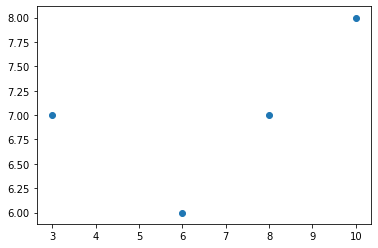

In [7]:
plt.scatter(x[:, 0], x[:, 1])

In [8]:
y = np.array([1, 2, 1, 2])

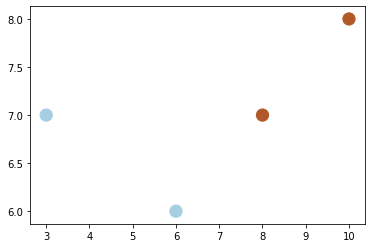

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = 'Paired', s = 150) # camp中有很多顏色可選

### step 1 打開一台空白函數學習機

In [13]:
from sklearn.svm import SVC

In [18]:
clf = SVC(gamma = 'auto') #gamma = 'auto'這行打了就不會跳警告

### step 2 訓練

In [19]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3 預測

In [20]:
y_predict = clf.predict(x)

In [21]:
y_predict

array([1, 2, 1, 2])

In [22]:
y

array([1, 2, 1, 2])

### 檢查看看有沒有認真分的方法

In [23]:
xr = np.random.rand(100)*7 +3
yr = np.random.rand(100)*2 +6

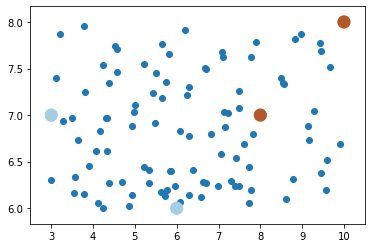

In [28]:
plt.scatter(xr, yr)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap ="Paired", s= 150)

In [29]:
print('X', xr[:5])
print('Y', yr[:5])

X [3.27635864 6.06897609 7.76870757 6.28872397 4.69016945]
Y [6.94147225 6.83279902 7.61982367 7.30586435 6.2838694 ]


In [31]:
X = np.c_[xr,yr]

In [32]:
Y = clf.predict(X)

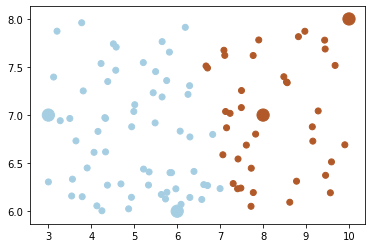

In [36]:
plt.scatter(x[:,0], x[:,1], c = y, cmap ="Paired", s = 150)
plt.scatter(X[:,0], X[:,1], c = Y, cmap ="Paired")

## 結果呈現

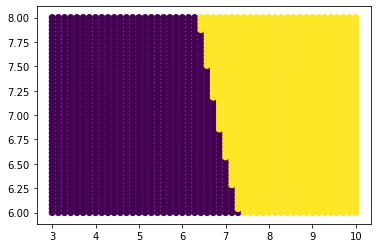

In [42]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:, 0], P[:, 1], c = C)

## 插播：contour用法

In [45]:
xL = np.array([1, 2, 3, 4])
yL = np.array([5, 6, 7, 8])
X, Y = np.meshgrid(xL, yL)

In [46]:
Z = np.random.randint(1, 3, (4, 4))

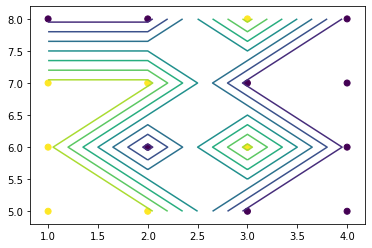

In [49]:
plt.contour(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c =Z.ravel())

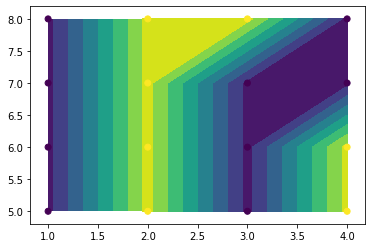

In [50]:
Z = np.random.randint(1, 3, (4, 4))
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c =Z.ravel())

# 終極版資料視覺化

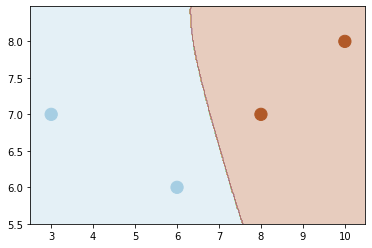

In [62]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape) # z照著x的樣子做reshape

plt.contourf(X, Y, Z, cmap = 'Paired', alpha = 0.3)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired', s = 150)

# 鳶尾花分類 真實數據訓練

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

In [65]:
iris = load_iris()

In [1]:
# print(iris. DESCR)

NameError: name 'iris' is not defined

In [68]:
x = iris.data
y = iris.target

In [70]:
y[:5]

array([0, 0, 0, 0, 0])

In [73]:
X = x[:, :2]
Y = y

In [74]:
len(X)

150

## 區分訓練資料、測試資料

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

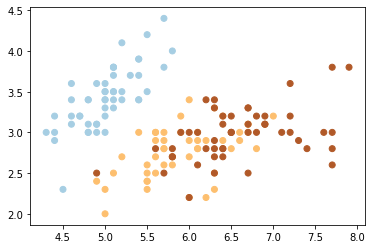

In [77]:
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'Paired')

# step 1 開空白函數學習機

In [78]:
clf = SVC(gamma = 'auto')

# step 2 訓練

In [79]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# step 3 預測

In [86]:
y_predict = clf.predict(x_test)

In [87]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [88]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [89]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

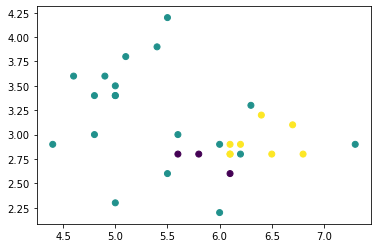

In [90]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_predict-y_test)

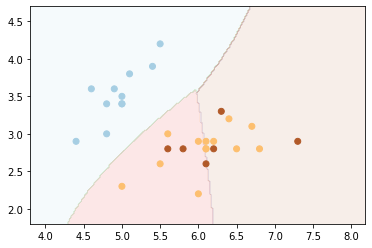

In [95]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap = 'Paired', alpha = 0.1)

plt.scatter(x_test[:, 0], x_test[:, 1], cmap = 'Paired', 
           c=y_test)

# 如何改進？